# Data exploration of Participant4
By Sheng Wang

### Aim
1. The aim of the report is to clean the data set and perform analysis to indicate any weekly trend of individual's step count.
2. How does weekend step counts different to the first two days of the week?

### Exploration
That we will first attempt to process the csv of marks of the participant's step data.The dataframe will be imported using pandas. We uses the pandas profiling for exploring the dataset.

In [1]:
#started 2022/10/08 finished 2022/10/08 by Sheng
import pandas as pd #import API
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from matplotlib.pyplot import MultipleLocator
n = pd.read_csv('C:/Users/danie/Downloads/Participant-04.csv')#read the data downloaded using pandas
n

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6018,08-Sep-2022 17:00,08-Sep-2022 18:00,537.0
6019,08-Sep-2022 18:00,08-Sep-2022 19:00,188.0
6020,08-Sep-2022 19:00,08-Sep-2022 20:00,215.0
6021,08-Sep-2022 20:00,08-Sep-2022 21:00,727.0


The dataframe has been imported.

We  then want to clean the data so it is able to answer our aim

In [25]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n['Start']), "Steps":n['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()#resample to combine days into weeks

f = e.reset_index(drop=False)#give index again
f

,Date,Steps
0,2022-01-09,71137.008341
1,2022-01-16,72000.345535
2,2022-01-23,76708.552968
3,2022-01-30,82691.949753
4,2022-02-06,72231.710790
5,2022-02-13,86187.376206
6,2022-02-20,83411.319657
7,2022-02-27,74467.556502
8,2022-03-06,74257.261975
9,2022-03-13,76971.907148


The hour measures has been merged into daily counts, then the days merged into week for weekly data.

(1.0, 36.0)

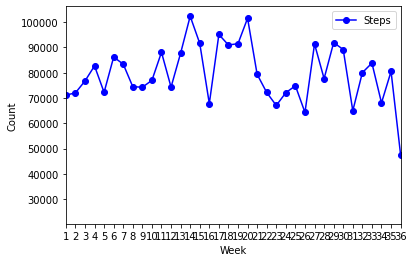

In [3]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration and work from Tianshu
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1,36)  # Set the x range matching the dataframe above



This graph shows the weekly data of this individual, is shows a quite high level of movement weekly. This will be used for comparison with others for the final product notebook to answer our aim

In [13]:

#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n['Start']), "Steps":n['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling
d


,Date,Steps
0,2022-01-01,6291.000000
1,2022-01-02,17815.000000
2,2022-01-03,8173.715753
3,2022-01-04,8843.948159
4,2022-01-05,8341.344430
...,...,...
246,2022-09-04,6273.361038
247,2022-09-05,8598.000000
248,2022-09-06,14000.000000
249,2022-09-07,10517.000000


In [29]:
d1 = d.drop([0,1,7,8,14,15,21,22,28,29,35,36,42,43,49,50,56,57,63,64,70,71,77,78,84,85,91,92,98,99,105,106,112,113,119,120,126,127,133,134,140,141,147,148,154,155,161,162,168,169,175,176,182,183,189,190,196,197,203,204,210,211,217,218,224,225,231,232,238,239,245,246])
d1['Date'] = pd.to_datetime(d1['Date'])
e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
f1 = e1.reset_index(drop=False)#give index again
f1

,Date,Steps
0,2022-01-09,49125.008341
1,2022-01-16,37324.629885
2,2022-01-23,50218.435114
3,2022-01-30,48076.949753
4,2022-02-06,41924.235219
5,2022-02-13,52616.376206
6,2022-02-20,47311.319657
7,2022-02-27,51786.556502
8,2022-03-06,40446.000000
9,2022-03-13,46708.907148


In [28]:
d2 = d.drop([0,1,2,3,9,10,16,17,23,24,30,31,37,38,44,45,51,52,58,59,65,66,72,73,79,80,86,87,93,94,100,101,107,108,114,115,121,122,128,129,135,136,142,143,149,150,156,157,163,164,170,171,177,178,184,185,191,192,198,199,205,206,212,213,219,220,226,227,233,234,240,241,247,248])
d2['Date'] = pd.to_datetime(d2['Date'])
e2 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
f2 = e2.reset_index(drop=False)#give index again
f2

,Date,Steps
0,2022-01-09,54119.344430
1,2022-01-16,54215.728993
2,2022-01-23,57728.737848
3,2022-01-30,59339.000000
4,2022-02-06,59726.710790
5,2022-02-13,66137.376206
6,2022-02-20,58535.319657
7,2022-02-27,53601.000000
8,2022-03-06,55809.261975
9,2022-03-13,61627.907148


(1.0, 35.0)

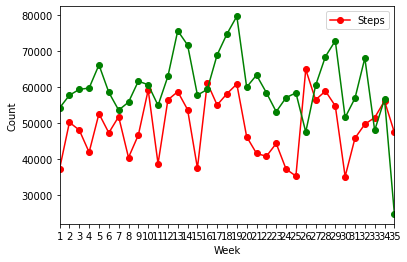

In [34]:

plt.plot(f1.index, f1['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f2.index, f2['Steps'], color="green",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1,35)  # Set the x range matching the dataframe above


(1.0, 35.0)

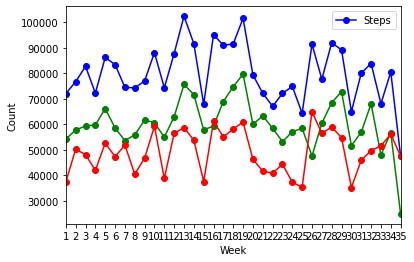

In [37]:
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f2.index, f2['Steps'], color="green",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count') 

plt.plot(f1.index, f1['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1,35)  # Set the x range matching the dataframe above
